In [24]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



In [25]:
# 2. Load Dataset
df = pd.read_csv(r"C:\Users\upadh\OneDrive\Desktop\new\Titanic-Dataset.csv")

# View first few rows and dataset info
print(df.head())
print(df.info())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [26]:
# 3. Drop Columns That Aren't Useful (safely)
cols_to_drop = ['Name', 'Ticket', 'Cabin']
existing_cols_to_drop = [col for col in cols_to_drop if col in df.columns]
df = df.drop(existing_cols_to_drop, axis=1)



In [27]:
# 4. Handle Missing Values
df['Age'].fillna(df['Age'].median(), inplace=True)

if 'Embarked' in df.columns:
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [28]:
# 5. Convert Categorical Variables
le = LabelEncoder()

if 'Sex' in df.columns:
    df['Sex'] = le.fit_transform(df['Sex'])  # male=1, female=0

if 'Embarked' in df.columns:
    df['Embarked'] = le.fit_transform(df['Embarked'])  # C=0, Q=1, S=2


In [30]:
# 6. Split the Data
X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# 7. Train a Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

In [33]:
# 8. Make Predictions
y_pred = model.predict(X_test)

In [34]:
# 9. Evaluate the Model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8268156424581006

Confusion Matrix:
 [[93 12]
 [19 55]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86       105
           1       0.82      0.74      0.78        74

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179



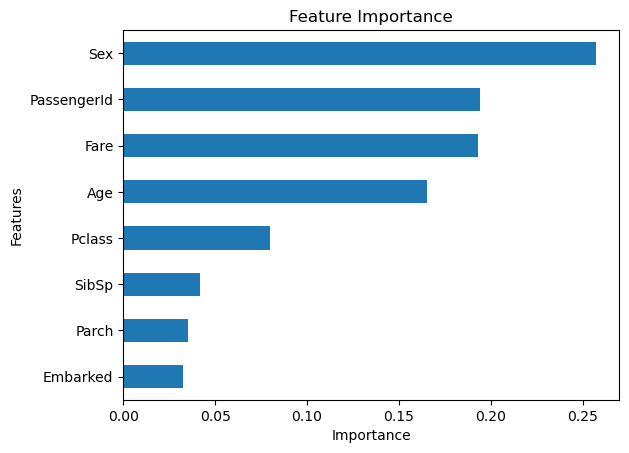

In [35]:
# 10. (Optional) Feature Importance
feat_imp = pd.Series(model.feature_importances_, index=X.columns)
feat_imp.sort_values().plot(kind='barh', title="Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()
